<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-11 06:13:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  57.3MB/s    in 3.5s    

2025-07-11 06:13:29 (57.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


array([[<Axes: title={'center': 'CompTotal'}>]], dtype=object)

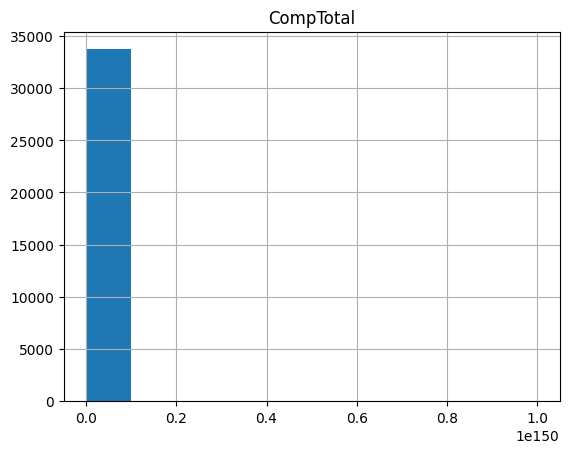

In [9]:
## Write your code here
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY,conn)
df.hist(column='CompTotal')

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


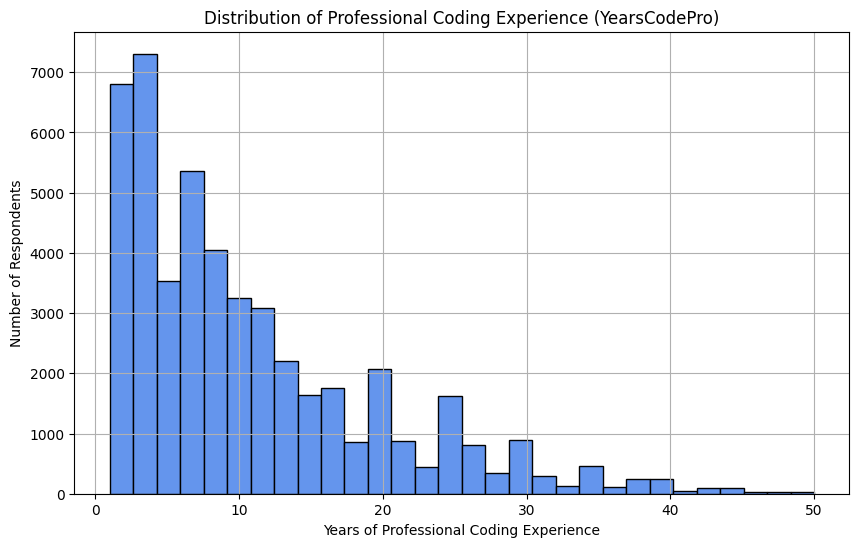

In [10]:
## Write your code here
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Clean the YearsCodePro column
# Convert to numeric (handles "Less than 1 year", "More than 50 years", etc.)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['YearsCodePro'])

plt.figure(figsize=(10, 6))
plt.hist(df_clean['YearsCodePro'], bins=30, color='cornflowerblue', edgecolor='black')
plt.title('Distribution of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


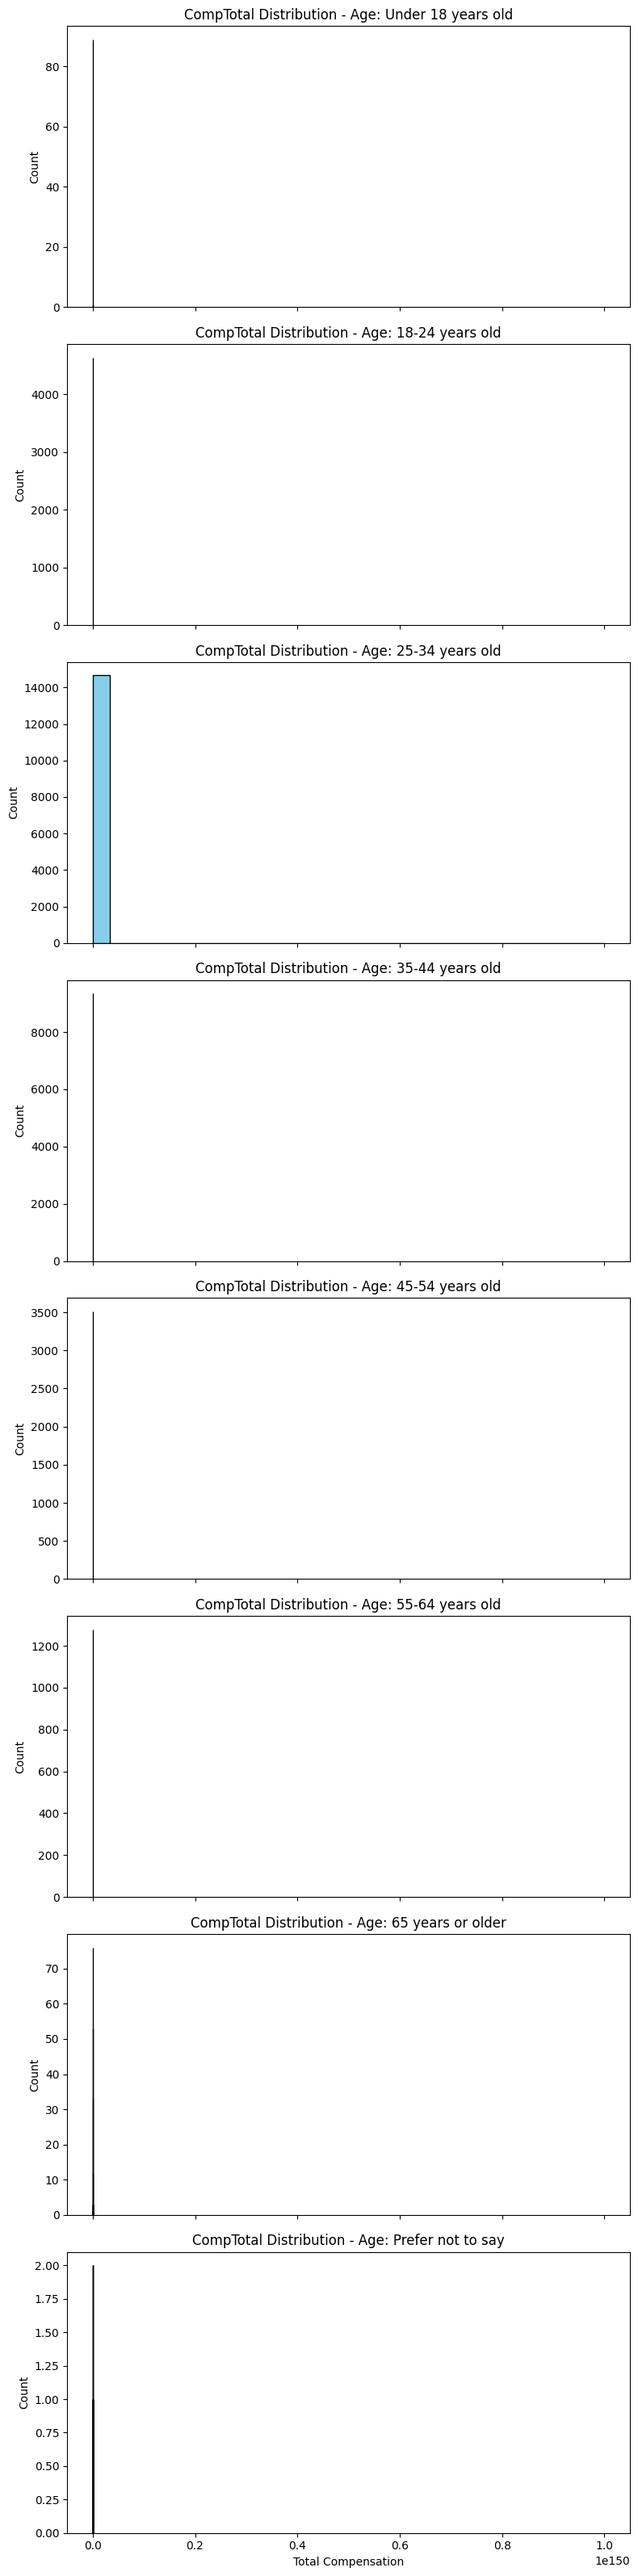

In [11]:

## Write your code here
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Drop rows with missing values in CompTotal or Age
df_clean = df.dropna(subset=['CompTotal', 'Age'])

# Define a logical order for age groups if applicable
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Keep only age groups that exist in the data
existing_ages = [age for age in age_order if age in df_clean['Age'].unique()]

# Plot histograms per age group
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(existing_ages), figsize=(8, 4 * len(existing_ages)), sharex=True)

for ax, age in zip(axes, existing_ages):
    group = df_clean[df_clean['Age'] == age]
    ax.hist(group['CompTotal'], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f"CompTotal Distribution - Age: {age}")
    ax.set_ylabel('Count')

axes[-1].set_xlabel('Total Compensation')
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


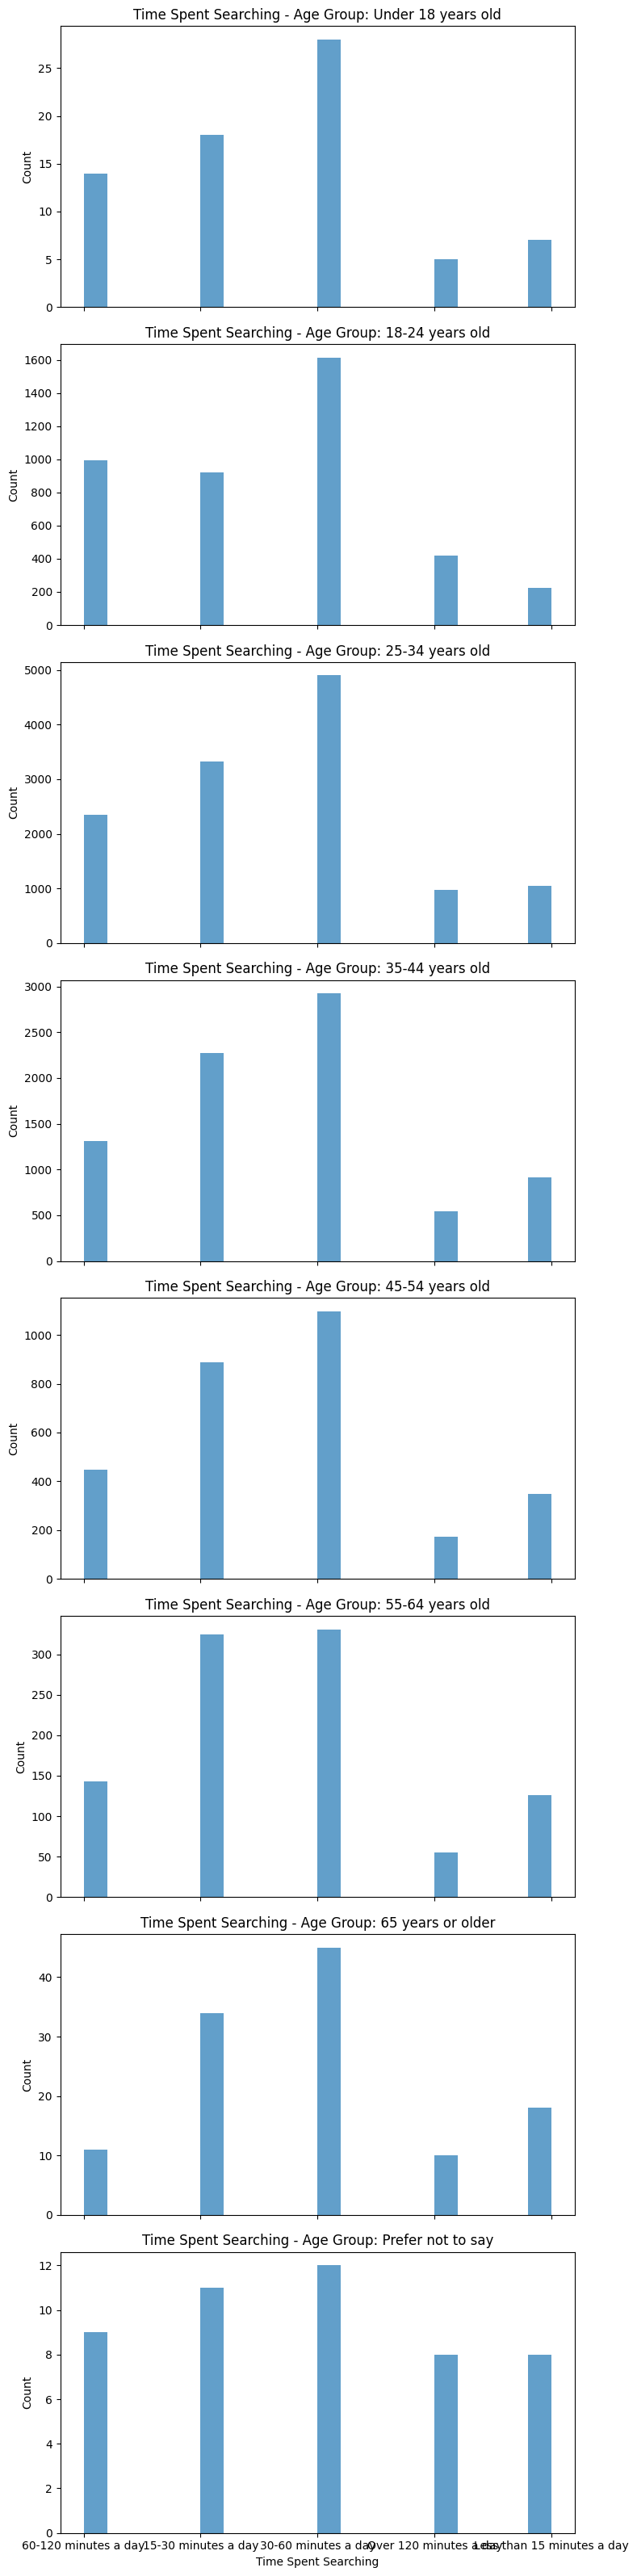

In [12]:
## Write your code here
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Drop missing values in relevant columns
df_clean = df.dropna(subset=['TimeSearching', 'Age'])

# Set up the figure
import matplotlib.pyplot as plt

# Get unique age groups sorted in a logical order (optional)
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Filter to only age groups that exist in the data
existing_ages = [age for age in age_order if age in df_clean['Age'].unique()]

# Create subplots
fig, axes = plt.subplots(nrows=len(existing_ages), figsize=(8, 4 * len(existing_ages)), sharex=True)

# Plot a histogram for each age group
for ax, age in zip(axes, existing_ages):
    df_age = df_clean[df_clean['Age'] == age]
    ax.hist(df_age['TimeSearching'], bins=20, alpha=0.7)
    ax.set_title(f"Time Spent Searching - Age Group: {age}")
    ax.set_ylabel("Count")

axes[-1].set_xlabel("Time Spent Searching")
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


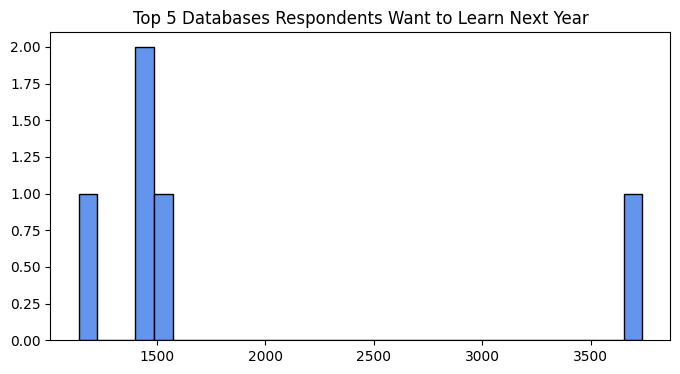

In [22]:
## Write your code here
# Fetch data from the SQLite database
QUERY = """ SELECT * FROM main """
df = pd.read_sql_query(QUERY, conn)

# Get the top 5 most common databases respondents wish to learn next year
top_databases = df['DatabaseWantToWorkWith'].value_counts().head(5)

# Create a pie chart
plt.figure(figsize=(8, 4))
plt.hist(top_databases, bins=30, color='cornflowerblue', edgecolor='black')

# Display the plot
plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.ylabel('')  # Hide the y-axis label
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


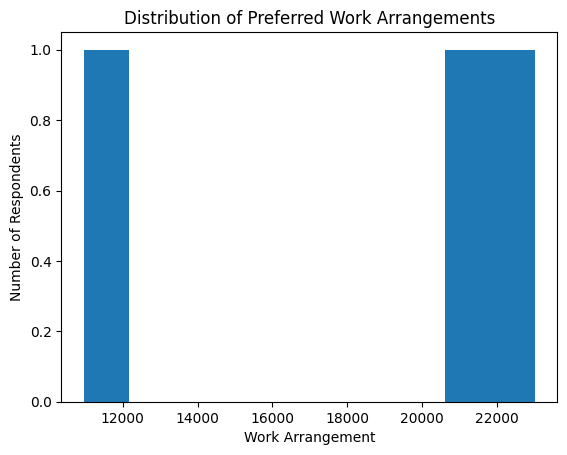

In [17]:
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Count occurrences of each work arrangement
remote_counts = df['RemoteWork'].value_counts()

# Plot a bar chart
remote_counts.plot(kind='hist')

# Add labels and title
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Preferred Work Arrangements')

# Display the plot
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


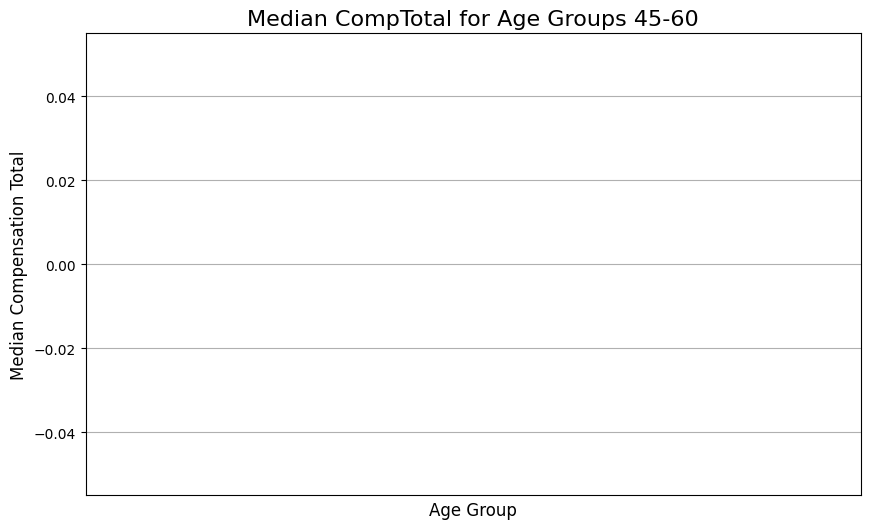

In [18]:
## Write your code here
# Fetch data from the SQLite database
QUERY = """ SELECT * FROM main """ 
df = pd.read_sql_query(QUERY, conn)

# Define age ranges and map them to numerical values if not already mapped
age_map = {
    '45-54 years old': 4,
    '55-64 years old': 5
}
df['AgeNum'] = df['Age'].map(age_map)

# Filter the data for the age range 45 to 60 (i.e., 45-54 and 55-64)
df_age_group = df[df['AgeNum'].isin([4, 5])]

# Calculate the median CompTotal for each age group
median_comp = df_age_group.groupby('Age')['CompTotal'].median().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.hist(median_comp['Age'], median_comp['CompTotal'])

# Customize the plot
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Compensation Total', fontsize=12)
plt.title('Median CompTotal for Age Groups 45-60', fontsize=16)

# Save the plot
plt.savefig('line_chart_median_comptotal.png')

# Display the plot
plt.grid(True)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


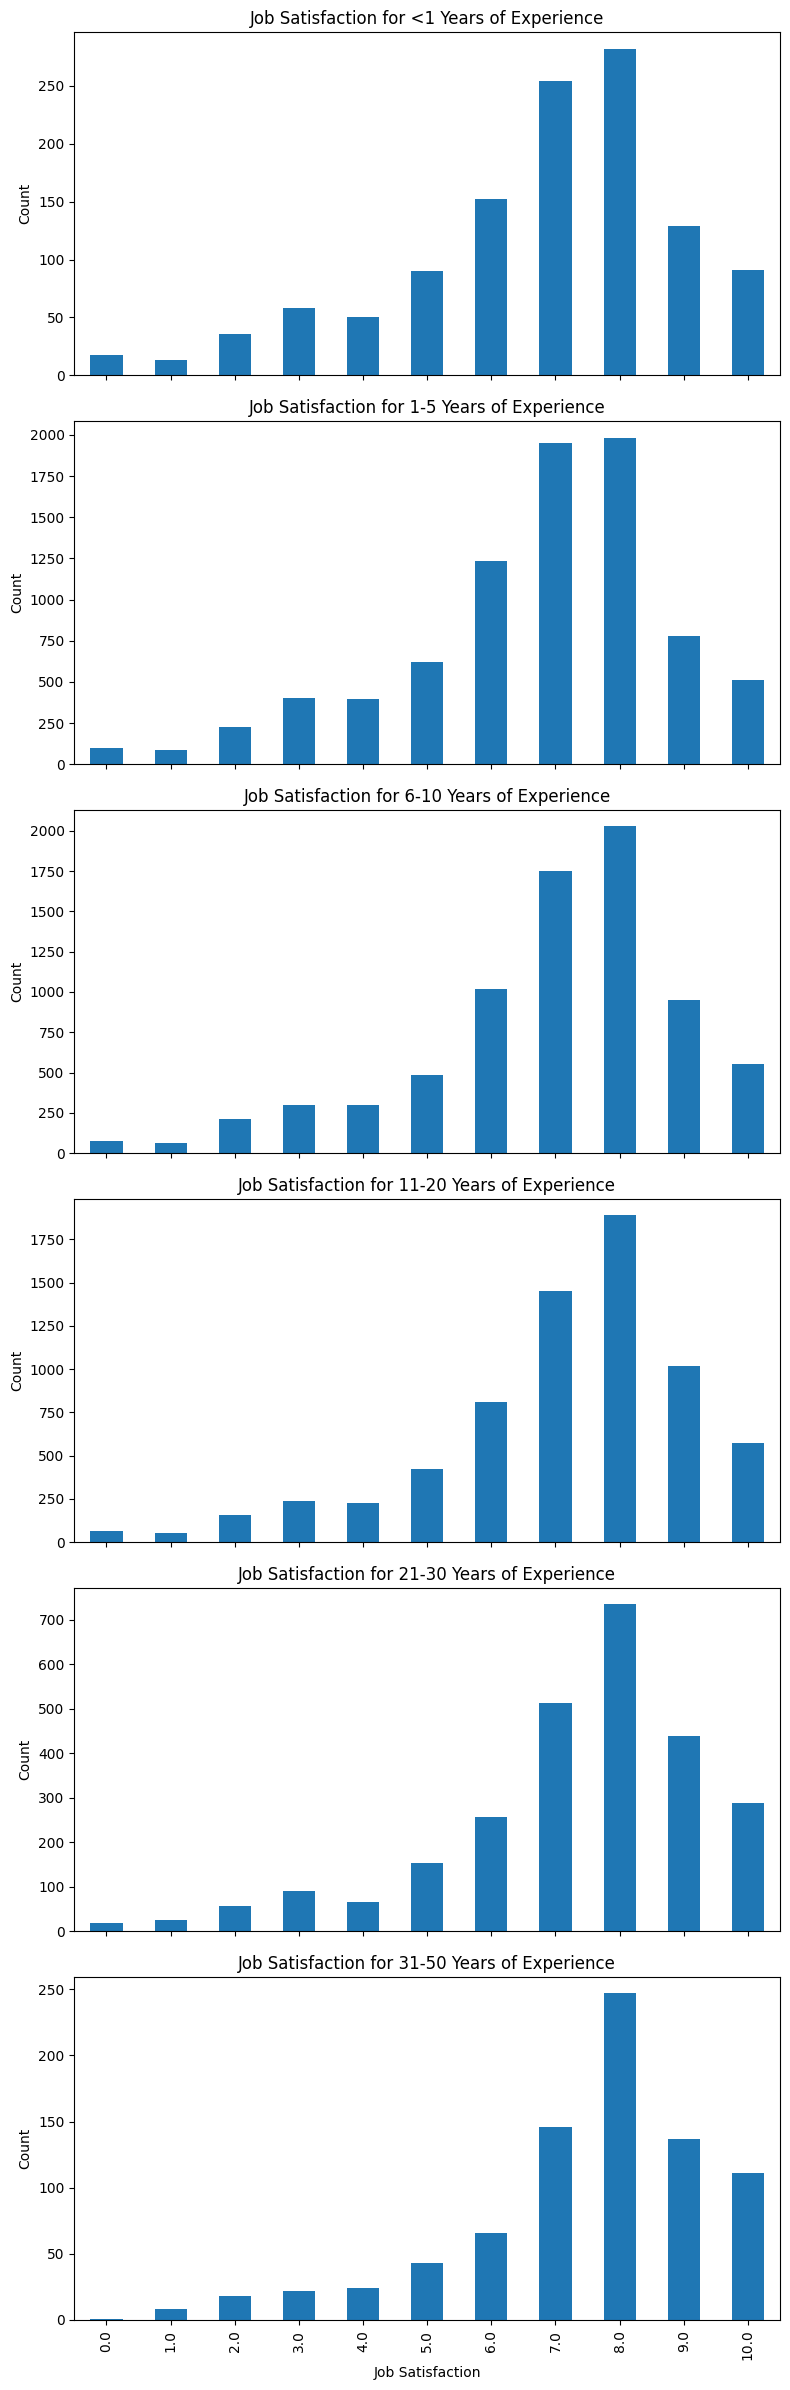

In [23]:
## Write your code here
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)

import matplotlib.pyplot as plt
import pandas as pd

# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop missing values in YearsCodePro and JobSat
df_clean = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Optional: Filter extreme values (e.g., over 50 years)
df_clean = df_clean[df_clean['YearsCodePro'] <= 50]

# Bin YearsCodePro into ranges
bins = [0, 1, 5, 10, 20, 30, 50]
labels = ['<1', '1-5', '6-10', '11-20', '21-30', '31-50']
df_clean['ExperienceBin'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels)

# Plot histograms of JobSat for each experience bin
fig, axes = plt.subplots(nrows=len(labels), figsize=(8, 4 * len(labels)), sharex=True)

for ax, label in zip(axes, labels):
    group = df_clean[df_clean['ExperienceBin'] == label]
    group['JobSat'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'Job Satisfaction for {label} Years of Experience')
    ax.set_ylabel('Count')
    ax.set_xlabel('Job Satisfaction')

plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
